In [1]:
import numpy as np
rand = np.random.RandomState(42)
t = 100 * rand.rand(100)
y = np.sin(2 * np.pi * t) + 0.1 * rand.randn(100)

In [2]:
import matplotlib.pyplot as plt
plt.scatter(t, y)
plt.show()

<Figure size 640x480 with 1 Axes>

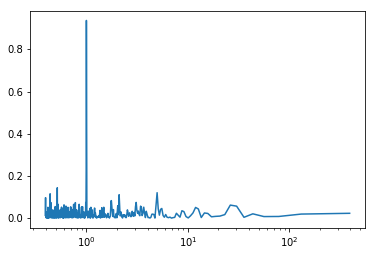

In [17]:
from astropy.stats import LombScargle
f, p = LombScargle(t, y).autopower(samples_per_peak=2)
plt.semilogx(1/f, p)

In [22]:
P = np.linspace(0.1, 10., len(f)*2)
p2 = LombScargle(t, y).power(1./P)

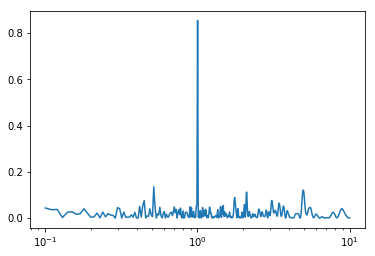

In [23]:
plt.semilogx(P, p2)

In [12]:
df = np.median(np.diff(f))
print(df)
print(1 / (np.max(t)-np.min(t)))

0.010189890448009109
0.01018989044800911


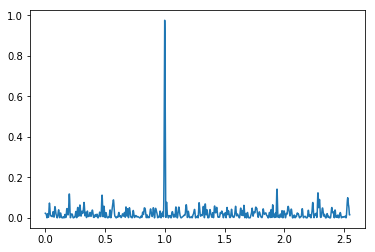

In [4]:
dy = 0.1
f, p = LombScargle(t, y, dy).autopower()
plt.plot(f, p)

In [5]:
import astropy.units as u
t_days = t * u.day
y_mags = y * u.mag
dy_mags = y * u.mag

In [6]:
f, p = LombScargle(t_days, y_mags, dy_mags).autopower()

In [7]:
print(f.unit)
print(p.unit)

1 / d



Autopower assumes a suitable ffrequency grid, with the width of peaks inverseley proportional to observation baseilne, and a maximum frequency of 5 times the average Nyquist frequency.

This is not universlaly useful. We can fine tune this as

In [8]:
f, p = LombScargle(t, y, dy).autopower(nyquist_factor=2)

In [9]:
len(f), f.min(), f.max()

(500, 0.0010189890448009111, 1.0179700557561102)

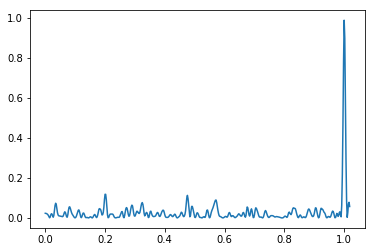

In [10]:
plt.plot(f, p)

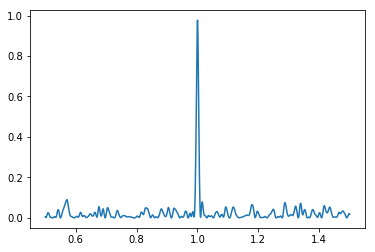

In [11]:
f = np.linspace(.5, 1.5, 1000)
p = LombScargle(t, y, dy).power(f)
plt.plot(f, p)

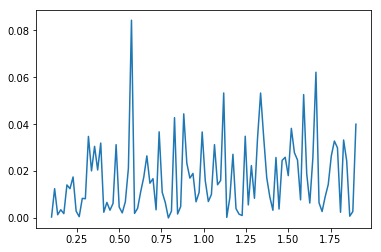

In [12]:
f = np.linspace(0.1, 1.9, 100)
p = LombScargle(t, y, dy).power(f)
plt.plot(f, p)

This is not good, better to use minimum and maxmimum frequency in autopower()

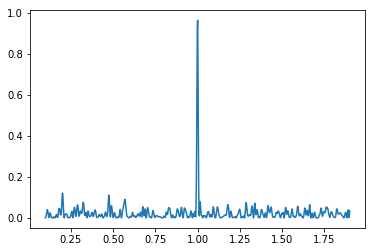

In [13]:
f, p = LombScargle(t, y, dy).autopower(minimum_frequency=0.1, maximum_frequency=1.9)
len(f)
plt.plot(f, p)

2749


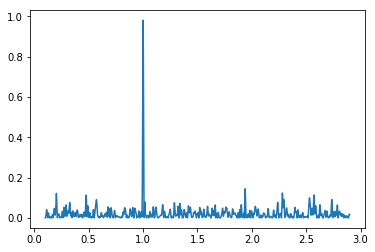

In [14]:
f, p = LombScargle(t, y, dy).autopower(minimum_frequency=0.1, 
                                       maximum_frequency=2.9,
                                      samples_per_peak=10)
print(len(f))
plt.plot(f, p)

What does the LS model look like?

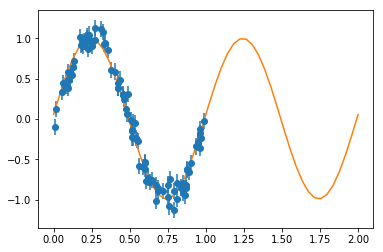

In [15]:
nmax = f[np.argmax(p)]
t_fit = np.linspace(0,2)
y_fit = LombScargle(t, y, dy).model(t_fit, nmax)
plt.errorbar(t%1, y, dy, fmt='o')
plt.plot(t_fit, y_fit)